In [82]:
import pandas as pd
import pandas.io.sql as pds
import sqlite3 as sq3
from ucimlrepo import fetch_ucirepo 
from pandasql import sqldf
from pandasql import load_births
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import datasets

from scipy.stats import norm
from scipy import stats

def pysqldf(q):
    return sqldf(q, globals())
import warnings 
warnings.filterwarnings('ignore')

import os

In [24]:
working_directory = os.getcwd()

fd = os.open("/Users/thomaswilliamson/Downloads", os.O_RDONLY)
os.fchdir(fd)
print(os.getcwd())

In [106]:
filepath = 'iris/iris.data'

data = pd.read_csv(filepath)


data.rename(columns={'5.1':'Sepal Length', '3.5':'Sepal Width', '1.4':'Petal Length', '0.2':'Petal Width', 'Iris-setosa':'Species'}, inplace=True)
print(data.iloc[:5])
data.loc[149] = [5.1, 3.5, 1.4, 0.2, 'Iris-setosa']

data.tail()


   Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica
149,5.1,3.5,1.4,0.2,Iris-setosa


In [110]:
data['Species'] = data['Species'].str.replace('Iris-', '')
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


EDA Principles: Summary Statistics, Visualizations, 
Data Wrangling: Pandas
Viz: Seaborn, MatPlotLib
Random Sampling

In [111]:

# Random Sampling
data.info()
sample = data.sample(n = 10, replace=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [112]:
print(sample)

     Sepal Length  Sepal Width  Petal Length  Petal Width     Species
0             4.9          3.0           1.4          0.2      setosa
66            5.8          2.7           4.1          1.0  versicolor
23            4.8          3.4           1.9          0.2      setosa
10            4.8          3.4           1.6          0.2      setosa
122           6.3          2.7           4.9          1.8   virginica
65            5.6          3.0           4.5          1.5  versicolor
2             4.6          3.1           1.5          0.2      setosa
121           7.7          2.8           6.7          2.0   virginica
6             5.0          3.4           1.5          0.2      setosa
48            5.0          3.3           1.4          0.2      setosa


In [113]:
print(sample.iloc[:,-3])

0      1.4
66     4.1
23     1.9
10     1.6
122    4.9
65     4.5
2      1.5
121    6.7
6      1.5
48     1.4
Name: Petal Length, dtype: float64


In [114]:
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [129]:
data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [115]:
data.loc[:,'Sepal Length']

0      4.9
1      4.7
2      4.6
3      5.0
4      5.4
      ... 
145    6.3
146    6.5
147    6.2
148    5.9
149    5.1
Name: Sepal Length, Length: 150, dtype: float64

In [116]:
data_num = data.select_dtypes(include = ['float64', 'object'])
print(data_num)

     Sepal Length  Sepal Width  Petal Length  Petal Width    Species
0             4.9          3.0           1.4          0.2     setosa
1             4.7          3.2           1.3          0.2     setosa
2             4.6          3.1           1.5          0.2     setosa
3             5.0          3.6           1.4          0.2     setosa
4             5.4          3.9           1.7          0.4     setosa
..            ...          ...           ...          ...        ...
145           6.3          2.5           5.0          1.9  virginica
146           6.5          3.0           5.2          2.0  virginica
147           6.2          3.4           5.4          2.3  virginica
148           5.9          3.0           5.1          1.8  virginica
149           5.1          3.5           1.4          0.2     setosa

[150 rows x 5 columns]


In [117]:
data_num_corr = data_num.corr()['Petal Width'][:-1]
top_features = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False)
print(top_features)

Petal Length    0.962757
Sepal Length    0.817954
Name: Petal Width, dtype: float64


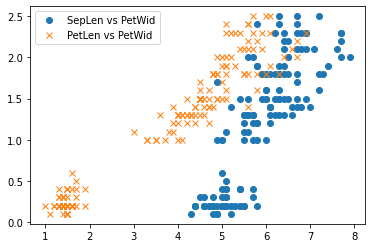

In [118]:
#Scatter plotting data features against each other

plt.plot(data['Sepal Length'], data['Petal Width'], ls='', marker='o', label='SepLen vs PetWid')
plt.plot(data['Petal Length'], data['Petal Width'], ls='', marker='x', label='PetLen vs PetWid')
plt.legend()

(array([ 1.,  0.,  3.,  4.,  3.,  8.,  5.,  9., 14., 10., 26., 12., 13.,
         6., 12.,  6.,  3.,  3.,  6.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([2.   , 2.096, 2.192, 2.288, 2.384, 2.48 , 2.576, 2.672, 2.768,
        2.864, 2.96 , 3.056, 3.152, 3.248, 3.344, 3.44 , 3.536, 3.632,
        3.728, 3.824, 3.92 , 4.016, 4.112, 4.208, 4.304, 4.4  ]),
 <BarContainer object of 25 artists>)

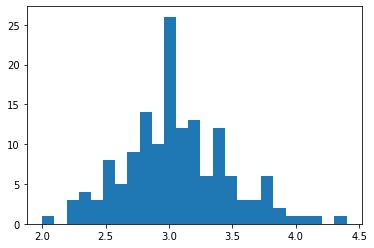

In [119]:
#Histograms

plt.hist(data['Sepal Width'], bins=25)

[Text(0.5, 0, 'Sepal Width'), Text(0, 0.5, 'ylabel'), Text(0.5, 1.0, 'title')]

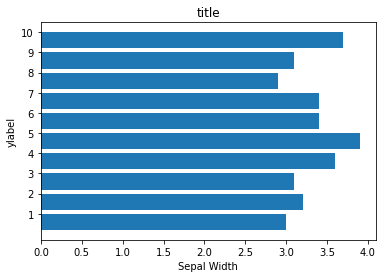

In [120]:
#Customize Plots
#matplotlib syntax of fig and ax allows us to call ax instead of plt
fig, ax = plt.subplots()
ax.barh(np.arange(10), data['Sepal Width'].iloc[:10])

# set position of ticks and labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='Sepal Width', ylabel='ylabel', title='title')

We can also use Pandas for plotting, which is nice!


<AxesSubplot:xlabel='Species'>

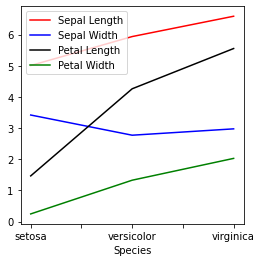

In [121]:
data.groupby('Species').mean().plot(color=['red','blue','black','green'], fontsize=10.0, figsize=(4,4))
#not the most useful graph lol but the idea holds

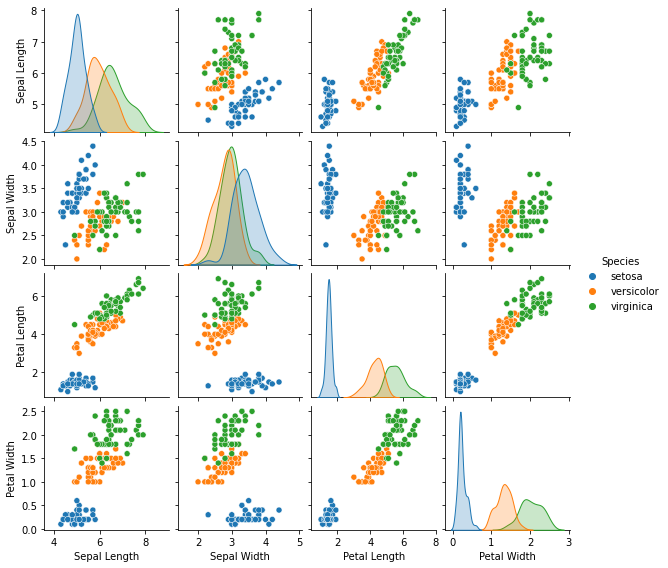

In [122]:
#Seaborn pairplot
sns.pairplot(data, hue='Species', size=2)

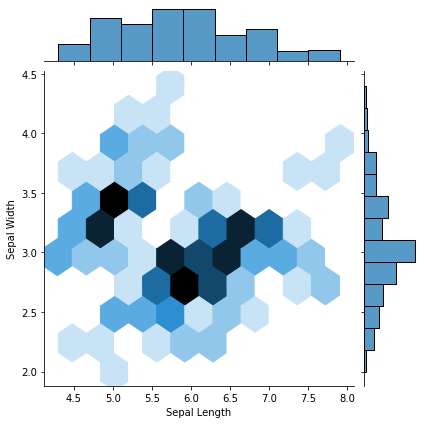

In [123]:
#Seaborn Hexbin plot
sns.jointplot(x=data['Sepal Length'], y=data['Sepal Width'], kind='hex')

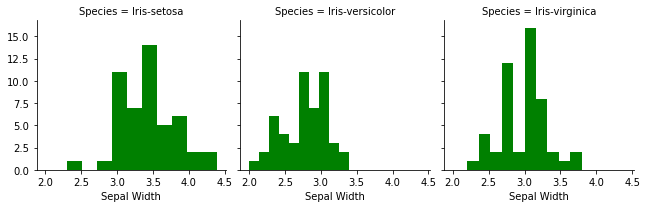

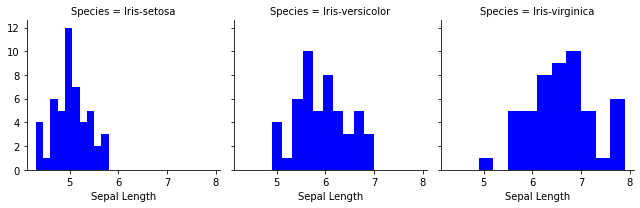

In [101]:
#Seaborn, facet grid

#first plot statement
plot = sns.FacetGrid(data, col='Species', margin_titles=True)
plot.map(plt.hist, 'Sepal Width', color='green')

#Second plot statement
plot = sns.FacetGrid(data, col='Species', margin_titles=True)
plot.map(plt.hist, 'Sepal Length', color='blue')

In [124]:
data.groupby('Species').mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [128]:
data.groupby('Species').agg(['mean','median'])

Sepal Length        Sepal Width        Petal Length         \
                   mean median        mean median         mean median   
Species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           Petal Width         
                  mean median  
Species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

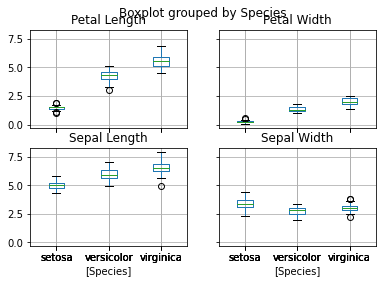

In [127]:
data.boxplot(by='Species');

Skewness: 0.303098


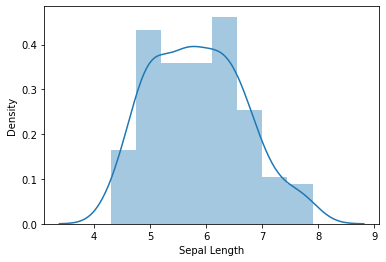

In [78]:
SepLen = sns.distplot(data['Sepal Length'])
print("Skewness: %f" % data['Sepal Length'].skew())

Skewness: 0.165365


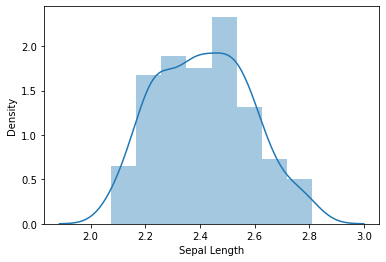

In [80]:
sqrt_SepLen = np.sqrt(data['Sepal Length'])
sqrt_SepPlot = sns.distplot(sqrt_SepLen)
print("Skewness: %f" % sqrt_SepLen.skew())